In [14]:
%matplotlib inline
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print(iris_data[0], iris_data[79], iris_data[100])
print(iris_labels[0], iris_labels[79], iris_labels[100])
iris_data[1:10]

[5.1 3.5 1.4 0.2] [5.7 2.6 3.5 1. ] [6.3 3.3 6.  2.5]
0 1 2


array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [15]:
np.random.seed(42)
indices = np.random.permutation(len(iris_data))
n_training_samples = 12
learnset_data = iris_data[indices[:-n_training_samples]]
learnset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]
print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]] [1 0 2 1]
[[5.7 2.8 4.1 1.3]
 [6.5 3.  5.5 1.8]
 [6.3 2.3 4.4 1.3]
 [6.4 2.9 4.3 1.3]] [1 2 1 1]


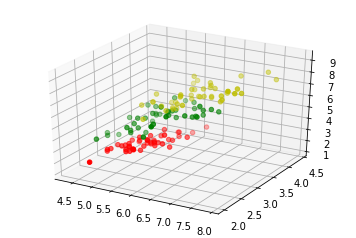

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
colours = ("r", "b")
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(learnset_data)):
        if learnset_labels[i] == iclass:
            X[iclass][0].append(learnset_data[i][0])
            X[iclass][1].append(learnset_data[i][1])
            X[iclass][2].append(sum(learnset_data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
       ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

In [17]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)
print(distance([3, 5], [1, 1]))
print(distance(learnset_data[3], learnset_data[44]))

4.47213595499958
3.4190641994557516


In [18]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where 
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [19]:
test_instance = [4.8, 2.5, 5.3, 2.4]

neighbors = get_neighbors(learnset_data, 
                          learnset_labels, 
                          test_instance, 
                          3, 
                          distance=distance)

print("test instance:", test_instance, "neighbors:", neighbors)

test instance: [4.8, 2.5, 5.3, 2.4] neighbors: [(array([5.7, 2.5, 5. , 2. ]), 1.0295630140987002, 2), (array([5.8, 2.8, 5.1, 2.4]), 1.0630145812734648, 2), (array([5.8, 2.7, 5.1, 1.9]), 1.1532562594670797, 2)]


The knn classifier returns for new iris data (4.8,2.5,5.3,2.4) three nearest neighbors with label 2. According to the learnset should be the new iris data a iris virginica.